In [92]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [93]:
my_filepath = '/kaggle/input/students-performance-in-exams/exams.csv'
students_data = pd.read_csv(my_filepath)

# General Steps in Exploratory Data Analysis

1. Understand the Data
2. Clean the Data (clean from any redundaces, Null, etc)
3. Analyse the Relationship between variables

## Step 1: Understanding the Data

In [94]:
students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [95]:
students_data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82
999,male,group A,some college,standard,completed,65,60,62


In [96]:
students_data.shape

(1000, 8)

From the shape method we can see that we have a relatively small dataset composed of 1000 rows

In [97]:
students_data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


To see all columns in the dataset

In [98]:
students_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

To check the number unique of values per columns

In [99]:
students_data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     77
reading score                  73
writing score                  76
dtype: int64

A look at parents levels of education

In [100]:
students_data['parental level of education'].unique()

array(['high school', 'some high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

## Step 2: Data Cleaning

In [101]:
students_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

OBVERVATION:  as per above we can see that we don't have any null values in the dataset****

In [102]:
# race/ethnicity and parental level of education are two varibles that's i'm noit interested in this analysis, so I'll remove those columns

students_data = students_data.drop(['race/ethnicity', 'parental level of education'], axis = 1)
students_data

,gender,lunch,test preparation course,math score,reading score,writing score
0,male,standard,completed,67,67,63
1,female,free/reduced,none,40,59,55
2,male,free/reduced,none,59,60,50
3,male,standard,none,77,78,68
4,male,standard,completed,78,73,68
...,...,...,...,...,...,...
995,male,standard,none,73,70,65
996,male,free/reduced,completed,85,91,92
997,female,free/reduced,none,32,35,41
998,female,standard,none,73,74,82


# Step 3: Analysis of Variables Relationships

The first analysis will be corelation, as this will allow to compute the pairwise correlation of columns to identify any strong positive or negative relationships between different features in the data.

In [103]:
corelation = students_data.corr()
corelation

,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000


<AxesSubplot:>

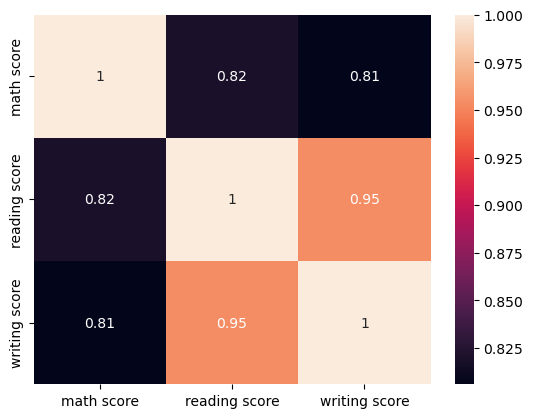

In [104]:
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

Now, it's also helpful to visualize the realtionship between paired varibles on plots

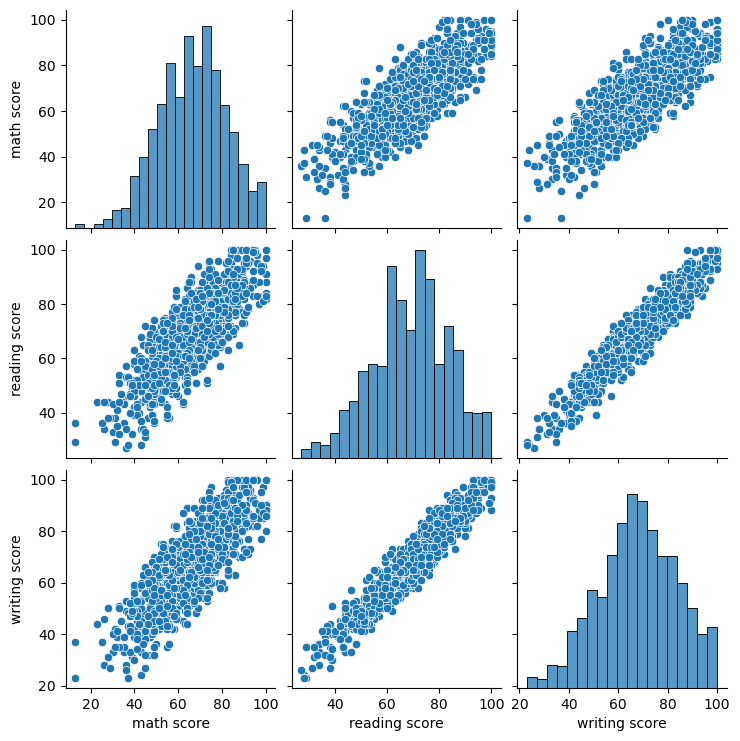

In [105]:
sns.pairplot(students_data)

To visualize relationship between males and females score for every category

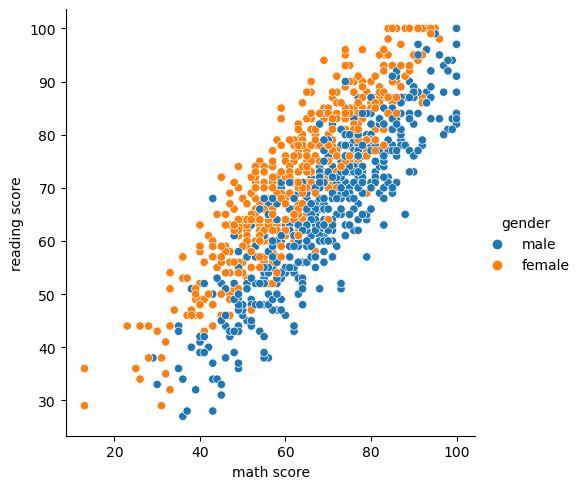

In [106]:
sns.relplot(x = 'math score', y = 'reading score', hue='gender', data=students_data)

From the plot above it can be concluded that females scores are higher for reading while males scores are higher for math.

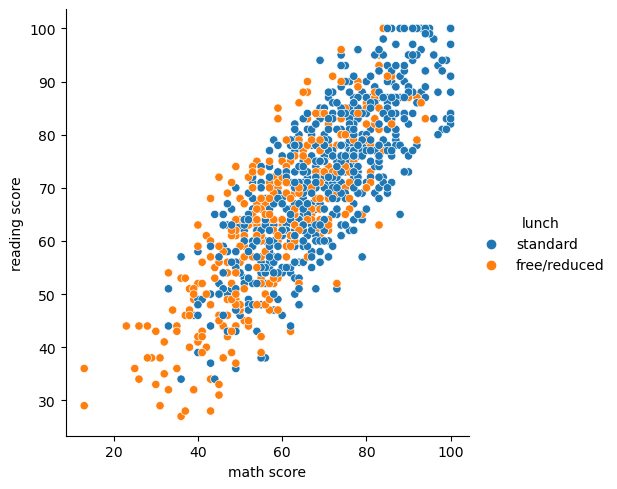

In [107]:
sns.relplot(x = 'math score', y = 'reading score', hue='lunch', data=students_data)

Now it can be concluded that students with stander lunch have relatively higher scores for reading and math compared to students with free/reduced lunch.

<AxesSubplot:xlabel='math score', ylabel='Count'>

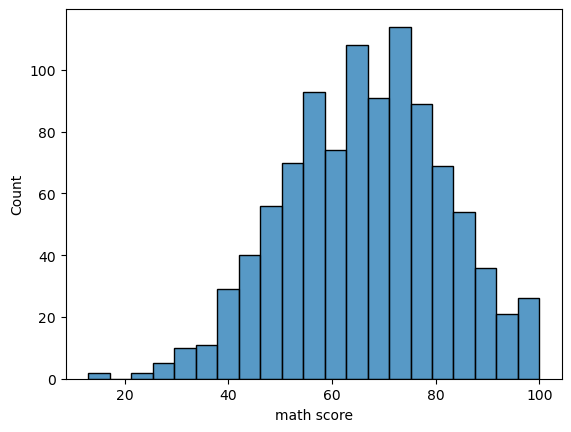

In [108]:
sns.histplot(students_data['math score'])

The distribution above shows that most students had Math scores between 65 and 75

<AxesSubplot:xlabel='reading score', ylabel='Count'>

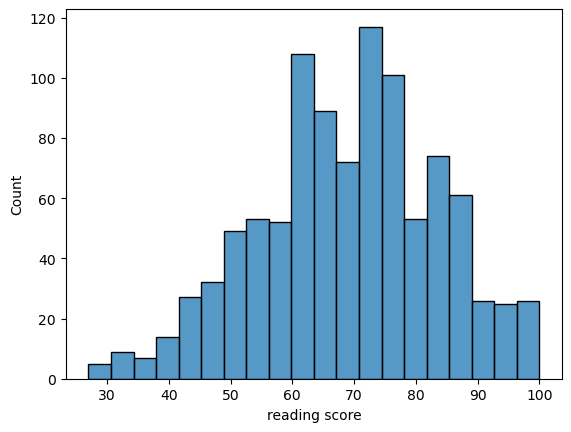

In [109]:
sns.histplot(students_data['reading score'])

The distribution above shows that most students had Reading scores between 60 and 78

<AxesSubplot:xlabel='writing score', ylabel='Count'>

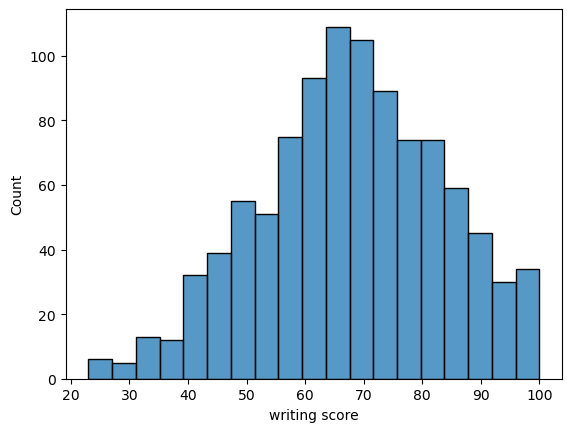

In [110]:
sns.histplot(students_data['writing score'])

The distribution above shows that most students had writing scores between 65 and 73

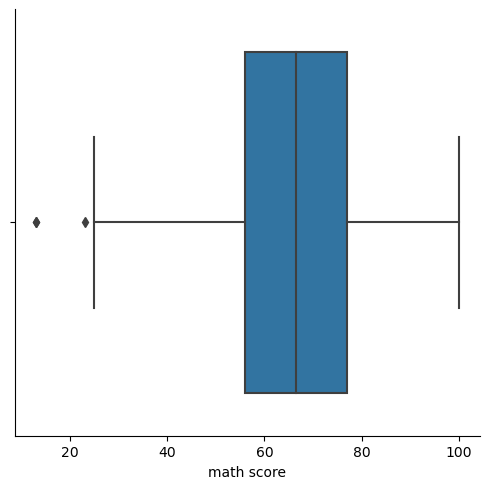

In [111]:
sns.catplot(x='math score', kind = 'box', data=students_data)

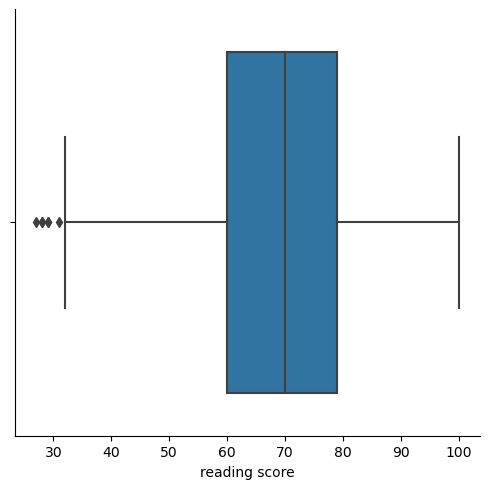

In [112]:
sns.catplot(x='reading score', kind = 'box', data=students_data)

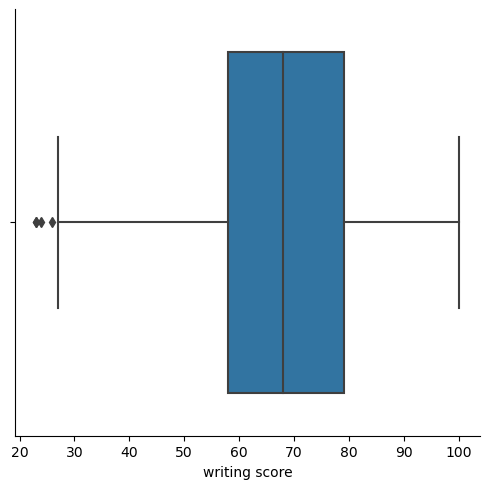

In [113]:
sns.catplot(x='writing score', kind = 'box', data=students_data)